For global optimization, its best to do a coarse search with an approximate model that is much faster than FDTD.

varFDTD allows for a much faster simulation. We will the characterize the speed of var FDTD vs FDTD and then check if varFDTD results work well in 3D, for various devices.

In [1]:
from config import Config
import os, sys
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path
root_path = Config.ROOT_DIR

In [2]:
from config import Config
import os, sys
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path
root_path = Config.ROOT_DIR

import numpy as np
import scipy as sp

import lumapi
from lumopt.utilities.wavelengths import Wavelengths
import lumopt.utilities.wavelengths as w1
from lumopt.geometries.polygon import FunctionDefinedPolygon
from lumopt.utilities.materials import Material
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimization import Optimization
from lumopt.geometries.geometry import Geometry
from lumopt_gl.geometries.geometry_gl import Geometry_GL
from lumopt_gl.optimizers.optimizer_gl import OptimizerGL
from lumopt_gl.optimization import OptimizationGL
from lumopt.optimizers.generic_optimizers import ScipyOptimizers

CONFIGURATION FILE {'root': 'C:\\Program Files/Lumerical/v232/api/python', 'lumapi': 'C:/Program Files/Lumerical/v232/api/python'}


In [3]:
from geometries.taper import taper_geo

In [3]:
def optimizer2D(polygon, base_script, max_iter = 25):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = ScipyOptimizers(max_iter = 10, method = 'L-BFGS-B', scaling_factor = 1e6, pgtol = 1e-5)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=True, store_all_simulations = False, plot_history = False)
    return opt

def optimizer3D(polygon, base_script, max_iter = 5):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental TE mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1) # for 3D, we need to specify TE/TM

    optimizer = OptimizerGL(max_iter = max_iter, ftol = 1.0e-5, method = 'LN_COBYLA')

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False, GPU = True, plot_history = False) # and set varFDTD to False. Set GPU to True if you have one.
    return opt

In [6]:
from geometries.taper import taper_geo

taper, base_script = taper_geo(dimension=2, mesh = 2)

opt = optimizer2D(taper, base_script)

Accurate interface detection enabled


In [5]:
opt.initialize()

Wavelength range of source object will be superseded by the global settings.


Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running NLopt optimizer
start = [2.88888889e-07 3.27777778e-07 3.66666667e-07 4.05555556e-07
 4.44444444e-07 4.83333333e-07 5.22222222e-07 5.61111111e-07]
Making forward solve
Running solves
Processing forward solve
FOM = 0.9941437019712952
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9882323691009066
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9511442739320686
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9310145737417371
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9795156635827073
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9931918151438699
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9868074667757135
Saved frame
False
Making forward solve
Running solves
Processing forward solve
FOM = 0.9878075955905604
Saved frame
False
Making forwar

(0.9998164155017023,
 array([2.85324630e-07, 2.98650285e-07, 3.37155305e-07, 3.85861525e-07,
        4.60305622e-07, 4.82834094e-07, 4.99601137e-07, 5.25966122e-07]))

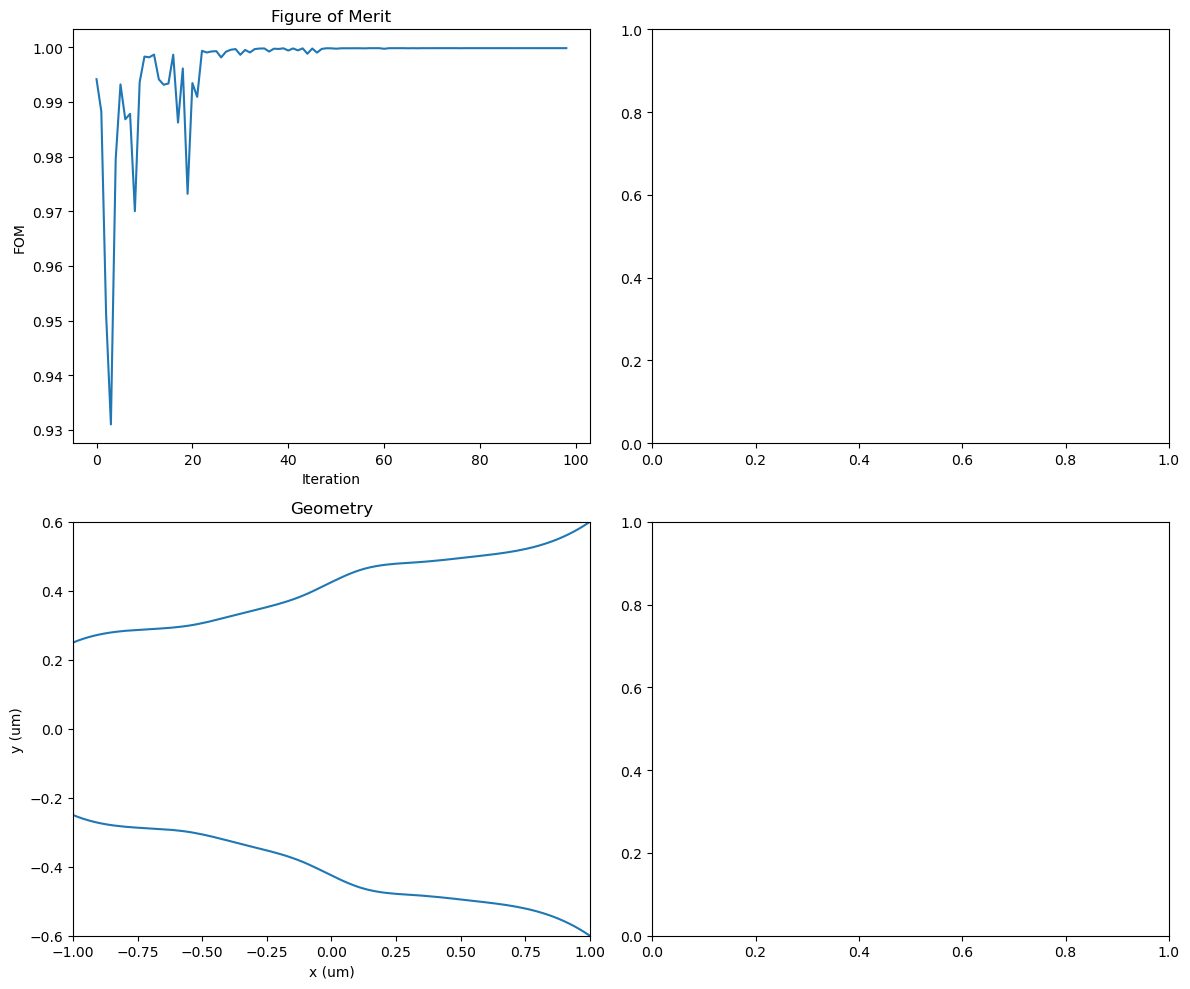

In [9]:
opt.run()

In [7]:
from geometries.SWG_finger import SWG_finger_geo

In [8]:
import numpy as np

# Number of points
num_points = 20

# Generate linearly spaced values between 0 and 1
linear_space = np.linspace(0, 1, num=num_points)

# Apply a non-linear transformation: square the linear space
non_linear_space = linear_space**2

# Scale these values to fit between 0.5 and 0.07
init_params = 0.5 - (0.5 - 0.07) * non_linear_space

print(init_params)


[0.5        0.49880886 0.49523546 0.48927978 0.48094183 0.47022161
 0.45711911 0.44163435 0.42376731 0.40351801 0.38088643 0.35587258
 0.32847645 0.29869806 0.2665374  0.23199446 0.19506925 0.15576177
 0.11407202 0.07      ]


In [5]:
import numpy as np

# Original array
init_params = np.array([0.5, 0.47736842, 0.45473684, 0.43210526, 0.40947368, 0.38684211, 
                        0.36421053, 0.34157895, 0.31894737, 0.29631579, 0.27368421, 
                        0.25105263, 0.22842105, 0.20578947, 0.18315789, 0.16052632, 
                        0.13789474, 0.11526316, 0.09263158, 0.07])

In [9]:

init_params = init_params * 1e-6

In [10]:
# Multiply each element by 10^-6

geo, base_script = SWG_finger_geo(dimension = 2, init_params=init_params)

opt = optimizer2D(geo, base_script)

Accurate interface detection enabled


In [11]:
opt.initialize()

Wavelength range of source object will be superseded by the global settings.


In [12]:
opt.run_forward_simulation(init_params)

0.9985372661450846

In [10]:
from lumopt_gl.utilities.lithography import LithographyOptimizer

In [11]:
opt.geometry.lithography_model = LithographyOptimizer(model='DUV')

In [13]:
opt.run()

Wavelength range of source object will be superseded by the global settings.


In [1]:
opt.run()

NameError: name 'opt' is not defined

In [ ]:
results_dir = os.path.join(root_path, 'results/simple_splitter')
opt1.run(working_dir=results_dir)

In [ ]:
params2 = opt.geometry.current_params

In [ ]:
from base_scripts.FDTD_y_branch import y_branch3D_init_

In [ ]:
def FDTD_ybranch():
    base_script = y_branch3D_init_

    ######## DEFINE SPECTRAL RANGE #########
    # Global wavelength/frequency range for all the simulations
    wavelengths = Wavelengths(start = 1530e-9, stop = 1560e-9, points = 11)

    ######## DEFINE OPTIMIZABLE GEOMETRY ########
    # Instead of using a FunctionDefinedPolygon like in the original example, we use a Geometry object composed of
    # multiple FunctionDefinedPolygon

    # The FunctionDefinedPolygon over which we optimize is defined by 10 parameters defining
    # the knots of a spline, and the resulting Polygon has 200 edges (from original example)

    # The other FunctionDefinedPolygons take no parameters, and return the shape of the waveguides (overlap base script)
    # waveguides.


    # Define and initialize control points for the spline
    initial_points_x = np.linspace(-1.0e-6, 1.0e-6, 7)
    initial_points_y = np.linspace(0.25e-6, 0.6e-6, initial_points_x.size)

    # Remove the first and last elements, as these will be control points, we do not want to allow them to be varied. 
    initial_params_x = initial_points_x[1:-1]
    initial_params_y = initial_points_y[1:-1]

    # define the spline function that will be called and updated at each optimization loop:

    def splitter(params = initial_params_y):
        '''defines a splitter by fitting a spline to the boundary'''
        
        # reconstruct the spline
        points_x = np.concatenate(([initial_points_x.min()], initial_params_x, [initial_points_x.max()]))
        points_y = np.concatenate(([initial_points_y[0]], params, [initial_points_y[-1]]))
        
        # interpolate between control points
        n_interpolation_points = 100
        polygon_points_x = np.linspace(min(points_x), max(points_x), n_interpolation_points)
        interpolator = sp.interpolate.interp1d(points_x, points_y, kind = 'cubic')
        polygon_points_y = interpolator(polygon_points_x)
        
        # zip the coordinates
        polygon_points_up = [(x, y) for x, y in zip(polygon_points_x, polygon_points_y)]
        polygon_points_down = [(x, -y) for x, y in zip(polygon_points_x, polygon_points_y)]
        polygon_points = np.array(polygon_points_up[::-1] + polygon_points_down)
        
        return polygon_points


    bounds = [(0.2e-6, 0.8e-6)] * initial_params_y.size

    # Set device and cladding materials, as well as as device layer thickness
    eps_in = Material(name = 'Si: non-dispersive', mesh_order = 2)
    eps_out = Material(name = 'SiO2: non-dispersive', mesh_order = 3)
    depth = 220.0e-9

    # Initialize FunctionDefinedPolygon class
    polygon = FunctionDefinedPolygon(func = splitter, 
                                    initial_params = initial_params_y,
                                    bounds = bounds,
                                    z = 0.0,
                                    depth = depth,
                                    eps_out = eps_out, eps_in = eps_in,
                                    edge_precision = 5,
                                    dx = 1.0e-9)
    
    ######## FIGURE OF MERIT ########
    fom = ModeMatch(monitor_name = 'fom',
                    mode_number = 'fundamental TE mode',
                    direction = 'Forward',
                    target_T_fwd = lambda wl: np.ones(wl.size),
                    norm_p = 1)

    ######## OPTIMIZATION ALGORITHM ########
    optimizer = ScipyOptimizers(max_iter = 30,
                                method = 'L-BFGS-B',
                                #scaling_factor = scaling_factor,
                                pgtol = 1.0e-5,
                                ftol = 1.0e-5,
                                #target_fom = 0.0,
                                scale_initial_gradient_to = 0.0)
    ######## PUT EVERYTHING TOGETHER ########
    opt = Optimization(base_script=base_script,
                    wavelengths = wavelengths,
                    fom = fom,
                    geometry = polygon,
                    optimizer = optimizer,
                    hide_fdtd_cad = False,
                    use_var_fdtd=False,
                    use_deps = True,
                    plot_history = True,
                    store_all_simulations = False,
                    #GPU = True
                    #use_deps_zip=True
                    )

    ######## RUN THE OPTIMIZER ########
    #opt.run(working_dir=results_dir)
    return opt

In [ ]:
opt2 = FDTD_ybranch()

In [ ]:
from scripts.computational_analysis import comp_analysis

In [ ]:
config1 = {
    'model': 'L-BFGS-B',
    'max_iter': 10
}
config2 = {
    'model': 'L-BFGS-B',
    'max_iter': 10
}

In [ ]:
results = comp_analysis([(opt1,config1),(opt2,config2)])

In [ ]:
print(results)

In [ ]:
opt.plot_history